Taller de Segmentación de Clientes con K-means en Python
Objetivo:
Aprender a realizar la segmentación de clientes utilizando el algoritmo K-means en Python. Este taller te guiará en los pasos para cargar los datos, procesarlos, aplicar el modelo de clustering, y finalmente interpretar los resultados para obtener grupos de clientes con características similares.

In [ ]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/Mall_Customers.csv

--2025-04-10 00:11:00--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/Mall_Customers.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/Mall_Customers.csv [following]
--2025-04-10 00:11:00--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/Mall_Customers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3981 (3.9K) [text/plain]
Saving to: ‘Mall_Customers.csv’

Mall_Customers.csv  100%[===================>]   3.89K  --.-KB/s    in 0s      

2025-04-10 00:11:00 (46.6 MB/s) - ‘

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('Mall_Customers.csv')

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40




Parte 1: Carga y exploración de datos
Instrucciones: Carga el siguiente conjunto de datos en un DataFrame de pandas. Luego, visualiza las primeras filas de los datos.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Pregunta 1: ¿Cuáles son las variables que contiene el conjunto de datos? Describe brevemente qué información proporciona cada variable.

CustomerID: Es el numero unico de identificacion de cada cliente

Gender: Es el genero ose masculino o femenino

Age: La edad de cada cliente

Annual Income: Ingresos anuales

Spending Score: Calificacion de 1 - 100 de su credito


Parte 2: Preprocesamiento de los datos
Instrucciones: Convierte la columna Gender a una variable numérica, y luego selecciona las columnas que utilizarás para aplicar el modelo de K-means. Finalmente, normaliza los datos para que todas las variables estén en la misma escala.

In [ ]:

data['Gender'] = data['Gender'].apply(lambda x: 1 if x == 'Male' else 0)


X = data[['Annual Income (k$)', 'Spending Score (1-100)']]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


Pregunta 2: ¿Por qué es importante normalizar los datos antes de aplicar el algoritmo K-means? Explica en qué consiste la normalización.



Antes de usar K-means, es clave normalizar los datos para que todos tengan una escala parecida y esten en formato numérico. Eso ayuda a que el algoritmo entienda mejor la info y pueda hacer bien su trabajo


Parte 3: Método del codo para determinar el número óptimo de clusters
Instrucciones: Utiliza el método del codo para determinar cuántos clusters son óptimos para el conjunto de datos.


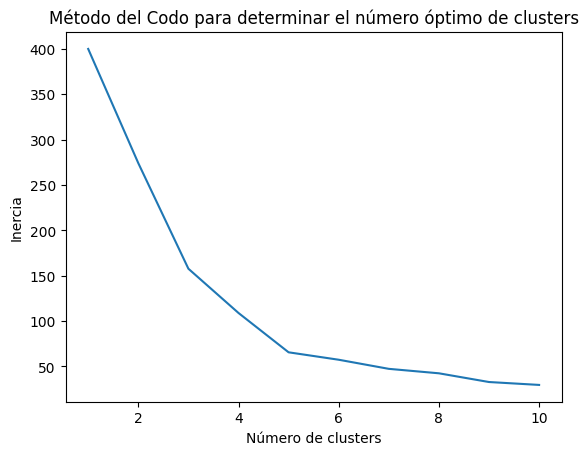

In [ ]:

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Graficamos los resultados
plt.plot(range(1, 11), inertia)
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo para determinar el número óptimo de clusters')
plt.show()



Pregunta 3: Observa la gráfica obtenida. ¿En qué punto parece formarse el "codo"? ¿Cuántos clusters crees que sería apropiado usar para este ejercicio?

El codo parece formarse en el punto 5 ya que la ganacia despues ya no representa algo bueni por el esfuerzo

Parte 4: Ajuste del modelo K-means y asignación de clusters
Instrucciones: Ajusta el modelo K-means con el número de clusters que determinaste en el paso anterior y asigna a cada cliente un número de cluster.

In [ ]:

optimal_clusters = 5  # Ajusta según lo determinado en el método del codo
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
data['Cluster'] = kmeans.fit_predict(X_scaled)

v = data.groupby('Cluster').mean()
print(v)



         CustomerID    Gender        Age  Annual Income (k$)  \
Cluster                                                        
0         86.320988  0.407407  42.716049           55.296296   
1        162.000000  0.461538  32.692308           86.538462   
2        164.371429  0.542857  41.114286           88.200000   
3         23.000000  0.391304  45.217391           26.304348   
4         23.090909  0.409091  25.272727           25.727273   

         Spending Score (1-100)  
Cluster                          
0                     49.518519  
1                     82.128205  
2                     17.114286  
3                     20.913043  
4                     79.363636  


In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,3
1,2,1,21,15,81,4
2,3,0,20,16,6,3
3,4,0,23,16,77,4
4,5,0,31,17,40,3


In [ ]:
data.groupby('Cluster').count()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,,
0,81,81,81,81,81
1,39,39,39,39,39
2,35,35,35,35,35
3,23,23,23,23,23
4,22,22,22,22,22


Pregunta 4: ¿Qué observas en los resultados? ¿Cómo se distribuyen los clientes en los diferentes clusters?

Grupo 0	tiene 81 personas
Grupo 1	tiene 39 personas
Grupo 2	tiene 35 personas
Grupo 3	tiene 23 personas
Grupo 4	tiene 22 personas


Parte 5: Análisis descriptivo de los clusters
Instrucciones: Realiza un análisis descriptivo de cada cluster. Calcula la edad promedio, el ingreso anual y el puntaje de gasto promedio de cada grupo de clientes.

In [ ]:
data.groupby('Cluster').mean()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,,
0,86.320988,0.407407,42.716049,55.296296,49.518519
1,162.000000,0.461538,32.692308,86.538462,82.128205
2,164.371429,0.542857,41.114286,88.200000,17.114286
3,23.000000,0.391304,45.217391,26.304348,20.913043
4,23.090909,0.409091,25.272727,25.727273,79.363636


Pregunta 5: ¿Qué diferencias observas entre los clusters en términos de edad, ingreso y puntaje de gasto? ¿Qué características definen a cada grupo?





El análisis con K-means permitió identificar cinco grupos con caracteristiacs diferenciadas

 El grupo 0 es el más numeroso, con una población de 81 personas, una edad promedio de 42 años, ingresos anuales medios de 55,2K y un gasto moderado de 49,5, donde el 40% son hombres. El grupo 1 destaca por su juventud (32 años en promedio), altos ingresos (86,6K) y un gasto elevado (82,1), siendo el 46% hombres y con 39 integrantes. En el grupo 2, aunque tienen ingresos altos (88,2K) y una edad promedio de 41 años, su gasto es muy bajo (17,1), con una ligera mayoría masculina (54%) y 35 personas. El grupo 3 presenta los ingresos más bajos (26,3K), un gasto moderado (20,9), una edad promedio de 45 años y está compuesto por 23 personas, de las cuales el 39% son hombres. Finalmente, el grupo 4 está formado por jóvenes de 25 años en promedio, con ingresos bajos (25,7K) pero un gasto sorprendentemente alto (79,3); este grupo tiene 22 personas y un 40% de participación masculina

Parte 6: Visualización de los clusters
Instrucciones: Grafica los clusters en un espacio bidimensional utilizando dos de las características principales (por ejemplo, edad y puntaje de gasto).

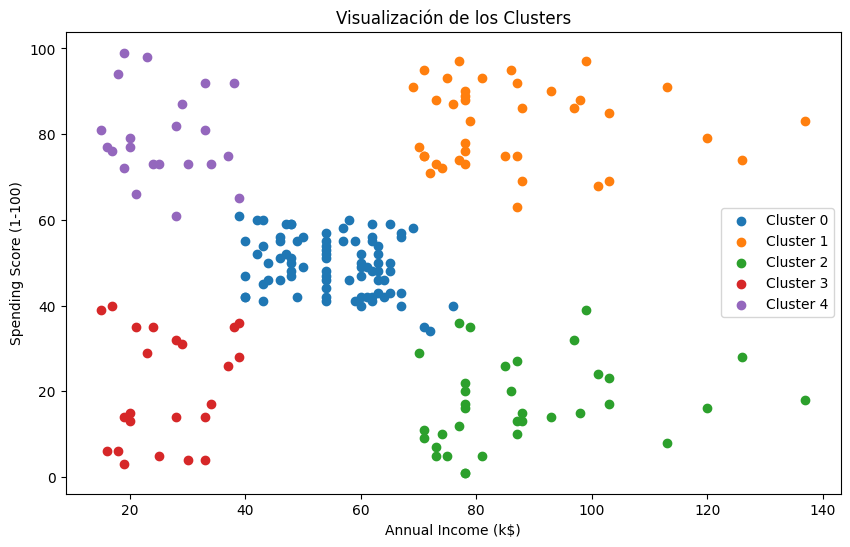

In [ ]:
plt.figure(figsize=(10, 6))
for cluster in range(optimal_clusters):
    plt.scatter(X[data['Cluster'] == cluster]['Annual Income (k$)'],
                X[data['Cluster'] == cluster]['Spending Score (1-100)'],
                label=f'Cluster {cluster}')


plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Visualización de los Clusters')
plt.legend()
plt.show()


Pregunta 6: Observa la gráfica. ¿Qué patrones puedes identificar visualmente en los datos? ¿Los clientes están claramente separados en grupos?

Vemos en la grafica como tenemos personas de bajos ingresos con bajos gastos, otro de gastos altos con ingresos bajos, uno promedio entre ingresoso y gastoos, y los ultimos 2 con ingresos altos uno con gastos bajos y otros con gastos altos


Parte 7: Interpretación y nombres de los clusters
Instrucciones: Basado en el análisis descriptivo y la visualización, asigna nombres a los clusters que describan a cada grupo de clientes. Por ejemplo, si un grupo tiene clientes jóvenes con altos puntajes de gasto, podrías llamarlo "Jóvenes con alto poder adquisitivo".

Pregunta 7: ¿Qué nombres asignarías a cada cluster? Justifica tu decisión basándote en las características promedio de los grupos.

**Grupo 0**:Adultos con ingresos y capacidad de endeudamiento bajo

**Grupo 1:** Aldultos con altos ingresos

**Grupo 2:** Adultos con altos ingresos y poca capacidad de endeudamiento

**Grupo 3:** Adultos con bajos ingresos

**Grupo 4**: Jovenes con bajos ingresos